In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',False)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import recall_score, precision_score, r2_score, accuracy_score, mean_absolute_error
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")

In [2]:
df_flights = pd.read_csv('cleaned_flights_300000sample1.csv')

In [3]:
one_hot = pd.get_dummies(df_flights[['crs_dep_bin','crs_arr_bin']])
df_flights = pd.concat([df_flights,one_hot],axis=1)

In [4]:
df_flights = df_flights.drop(['op_unique_carrier','origin','dest','origin','dest','fl_date','date_time','location','crs_dep_bin','crs_arr_bin'],axis=1)

In [5]:
df_flights

,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,crs_dep_bin_Afternoon,crs_dep_bin_Evening,crs_dep_bin_Morning,crs_dep_bin_Night,crs_arr_bin_Afternoon,crs_arr_bin_Evening,crs_arr_bin_Morning,crs_arr_bin_Night
0,20,21,106.0,72.0,243.0,6,1,0.0,0.4,10,8,0,0,0,1,0,0,0,1
1,8,9,46.0,71.0,282.0,7,1,0.0,6.5,9,18,1,0,0,0,1,0,0,0
2,7,9,19.0,154.0,773.0,10,4,0.0,0.1,10,8,1,0,0,0,1,0,0,0
3,22,0,8.0,156.0,815.0,10,0,0.0,0.7,8,5,0,0,0,1,0,0,1,0
4,6,10,-25.0,318.0,1990.0,10,5,0.0,0.1,10,14,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288587,7,7,-8.0,115.0,411.0,4,3,0.0,3.3,10,7,1,0,0,0,1,0,0,0
288588,6,8,4.0,127.0,585.0,3,5,0.0,21.7,9,20,1,0,0,0,1,0,0,0
288589,6,10,19.0,227.0,1249.0,1,0,0.1,0.2,9,30,1,0,0,0,1,0,0,0
288590,15,18,-16.0,120.0,755.0,1,2,0.0,0.0,10,10,0,1,0,0,0,0,0,1


In [6]:
X = df_flights.drop(['arr_delay'],axis=1)
y = df_flights['arr_delay']

In [7]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns=X.columns)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.25,random_state=65)

In [9]:
params = {
    'n_estimators': [50,100,150,200,250,300],
    'max_depth': [1,3,5,7,9]
}
n=5

In [10]:
rf = RandomForestRegressor()
grid = GridSearchCV(estimator=rf,param_grid=params,cv=n,scoring='r2',verbose=1,n_jobs=-1)

In [ ]:
grid_results = grid.fit(X_train,y_train)

In [ ]:
#save model with pickle
# filename = 'gridsearchcv.sav'
# pickle.dump(grid,open(filename,'wb'))

In [11]:
#load model with pickle
grid_results = pickle.load(open('gridsearchcv.sav','rb'))

In [12]:
grid_pred = grid_results.predict(X_test)

In [13]:
best_score = grid_results.best_score_
best_params = grid_results.best_params_
print('Best Score:',best_score)
print('Best Params:',best_params)

Best Score: 0.06357993643265733
Best Params: {'max_depth': 9, 'n_estimators': 250}


In [16]:
rf_rmse = np.sqrt(mean_squared_error(y_test,grid_pred))
print(f'Root Mean Square Error: {rf_rmse}')

Root Mean Square Error: 27.94893875436077


In [17]:
rf_mae = mean_absolute_error(y_test,grid_pred)
print(f'Mean Absolute Error: {rf_mae}')

Mean Absolute Error: 18.440732992903133


In [124]:
grid_diff = grid_pred-y_test

grid_df = pd.DataFrame({'grid_pred':grid_pred,
                       'y_test':y_test,
                       'difference':grid_diff})

In [125]:
grid_df.head()

,grid_pred,y_test,difference
279780,-3.968011,-22.0,18.031989
224850,1.531644,7.0,-5.468356
169042,-4.001614,-13.0,8.998386
168470,-4.513008,-2.0,-2.513008
260180,-3.657757,-17.0,13.342243


In [126]:
grid_df.describe()

,grid_pred,y_test,difference
count,72148.000000,72148.000000,72148.000000
mean,1.129299,1.066433,0.062867
std,7.195519,28.999379,27.725786
min,-23.095260,-77.000000,-165.332762
25%,-3.635497,-15.000000,-5.907077
50%,-0.677188,-7.000000,6.359009
75%,3.302286,6.000000,15.490964
max,100.484829,162.000000,90.948889


In [88]:
feature_importances = grid_results.best_estimator_.feature_importances_

In [89]:
feature_importances = {'feature_importance':feature_importances}
features_df = pd.DataFrame(feature_importances,index=X_test.columns)

In [90]:
features_df

,feature_importance
crs_dep_time,0.236666
crs_arr_time,0.035858
crs_elapsed_time,0.056273
distance,0.065887
month,0.088156
weekday,0.032652
totalSnow_cm,0.080580
precipMM,0.296498
visibility,0.030117
windspeedKmph,0.067514


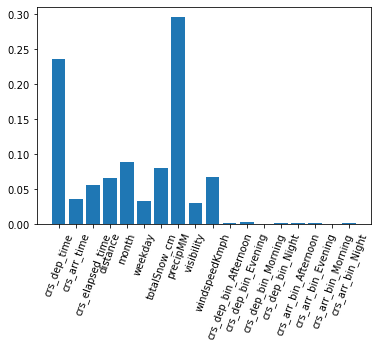

In [94]:
pyplot.bar(features_df.index,features_df['feature_importance'])
plt.xticks(rotation=70)
pyplot.show()

### Test GridSearchCV without the departure and arrival bins.

In [3]:
#reload dataset
df_flights = pd.read_csv('cleaned_flights_300000sample1.csv')

In [4]:
df_flights = df_flights.drop(['op_unique_carrier','origin','dest','origin','dest','fl_date','date_time','location','crs_dep_bin','crs_arr_bin'],axis=1)

In [5]:
df_flights.head()

,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph
0,20,21,106.0,72.0,243.0,6,1,0.0,0.4,10,8
1,8,9,46.0,71.0,282.0,7,1,0.0,6.5,9,18
2,7,9,19.0,154.0,773.0,10,4,0.0,0.1,10,8
3,22,0,8.0,156.0,815.0,10,0,0.0,0.7,8,5
4,6,10,-25.0,318.0,1990.0,10,5,0.0,0.1,10,14


In [6]:
X2 = df_flights.drop(['arr_delay'],axis=1)
y2 = df_flights['arr_delay']

In [7]:
scaler = StandardScaler()
X_scale2 = scaler.fit_transform(X2)
X_scale2 = pd.DataFrame(X_scale2,columns=X2.columns)

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale2,y2,test_size=0.25,random_state=65)

In [9]:
params = {
    'n_estimators': [50,100,150,200,250,300],
    'max_depth': [1,3,5,7,9]
}
n=5

In [10]:
rf = RandomForestRegressor()
grid2 = GridSearchCV(estimator=rf,param_grid=params,cv=n,scoring='r2',verbose=1,n_jobs=-1)

In [11]:
grid_results2 = grid2.fit(X_train2,y_train2)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [12]:
#save model with pickle
# filename2 = 'GridSearchCV_nobins.sav'
# pickle.dump(grid2,open(filename2,'wb'))

In [3]:
#load model with pickle
grid_results2 = pickle.load(open('gridsearchcv_nobins.sav','rb'))

In [13]:
grid_pred2 = grid_results2.predict(X_test2)

In [49]:
rf_rmse2 = np.sqrt(mean_squared_error(y_test2,grid_pred2))
print(f'Root Mean Square Error: {rf_rmse2}')

Root Mean Square Error: 28.26187118693062


In [50]:
rf_mae2 = mean_absolute_error(y_test2,grid_pred2)
print(f'Mean Absolute Error: {rf_mae2}')

Mean Absolute Error: 18.594549491955583


In [43]:
best_score2 = grid_results2.best_score_
best_params2 = grid_results2.best_params_
print('Best Score:',best_score2)
print('Best Params:',best_params2)

Best Score: 0.06352145408002144
Best Params: {'max_depth': 9, 'n_estimators': 300}


In [17]:
grid_diff2 = grid_pred2-y_test2

grid_df2 = pd.DataFrame({'grid_pred':grid_pred2,
                       'y_test':y_test2,
                       'difference':grid_diff2})

In [18]:
grid_df2.head()

,grid_pred,y_test,difference
273581,15.964173,-39.0,54.964173
127522,-6.352822,25.0,-31.352822
95246,-3.425939,7.0,-10.425939
184353,0.866370,-10.0,10.866370
269943,-5.256001,-6.0,0.743999


In [19]:
grid_df2.describe()

,grid_pred,y_test,difference
count,72148.000000,72148.000000,72148.000000
mean,1.075163,1.142014,-0.066851
std,7.056536,29.233868,28.261988
min,-20.232534,-80.000000,-169.148891
25%,-3.548678,-15.000000,-6.110427
50%,-0.529017,-7.000000,6.459047
75%,3.072221,6.000000,15.619772
max,93.829828,162.000000,81.561984


In [20]:
feature_importances2 = grid_results2.best_estimator_.feature_importances_

In [21]:
feature_importances2

array([0.24381119, 0.04342759, 0.0586053 , 0.0656693 , 0.08280067,
       0.03408807, 0.08344982, 0.2910812 , 0.03179229, 0.06527458])

In [22]:
feature_importances2 = {'feature_importance':feature_importances2}
features_df2 = pd.DataFrame(feature_importances2,index=X_test2.columns)

In [23]:
features_df2

,feature_importance
crs_dep_time,0.243811
crs_arr_time,0.043428
crs_elapsed_time,0.058605
distance,0.065669
month,0.082801
weekday,0.034088
totalSnow_cm,0.083450
precipMM,0.291081
visibility,0.031792
windspeedKmph,0.065275


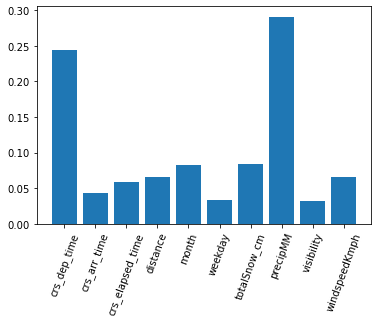

In [24]:
pyplot.bar(features_df2.index,features_df2['feature_importance'])
plt.xticks(rotation=70)
pyplot.show()

### Trying with new passengers features. First with no crs bins

In [25]:
df_flights2 = pd.read_csv('cleaned_flights_sample2.csv')

In [26]:
df_flights2.head()

,fl_date,op_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,crs_dep_bin,crs_arr_bin,totalSnow_cm,precipMM,visibility,windspeedKmph,departures_performed,payload,seats,passengers,freight,mail,ramp_to_ramp,avg_passengers,avg_percent_capacity
0,2019-06-18,OO,DTW,PLN,20,21,106.0,72.0,243.0,6,1,Night,Night,0.0,0.4,10,8,100.0,1238000.0,5000.0,3868.0,0.0,0.0,6429.0,39.0,0.77
1,2019-07-02,YV,DFW,LBB,8,9,46.0,71.0,282.0,7,1,Afternoon,Afternoon,0.0,6.5,9,18,169.0,3415490.0,13150.0,9361.0,1346.0,1260.0,10863.0,55.0,0.71
2,2019-10-11,ZW,SAV,ORD,7,9,19.0,154.0,773.0,10,4,Afternoon,Afternoon,0.0,0.1,10,8,26.0,626600.0,1300.0,1058.0,0.0,0.0,3796.0,41.0,0.81
3,2019-10-14,OH,CLT,DSM,22,0,8.0,156.0,815.0,10,0,Night,Morning,0.0,0.7,8,5,92.0,1746550.0,6343.0,4891.0,42.0,0.0,14307.0,53.0,0.77
4,2019-10-26,DL,JFK,SLC,6,10,-25.0,318.0,1990.0,10,5,Afternoon,Afternoon,0.0,0.1,10,14,115.0,5919710.0,20844.0,18457.0,49708.0,93985.0,35621.0,160.0,0.89


In [27]:
# Trying with no bins as they dont seem to have much importance from above.
df_flights2 = df_flights2.drop(['fl_date','op_unique_carrier','origin','dest','crs_dep_bin','crs_arr_bin','departures_performed','payload','seats','passengers','freight','mail','ramp_to_ramp'],axis=1)

In [28]:
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [29]:
# One hot encode months and weekday
one_month = pd.get_dummies(df_flights2['month'],columns=months)
one_month.columns=[months]
one_days = pd.get_dummies(df_flights2['weekday'],columns=months)
one_days.columns=[days]

In [30]:
df_flights2 = pd.concat([df_flights2,one_month,one_days],axis=1)

In [31]:
# Drop original date columns
df_flights2 = df_flights2.drop(['month','weekday'],axis=1)

In [32]:
df_flights2

,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,totalSnow_cm,precipMM,visibility,windspeedKmph,avg_passengers,avg_percent_capacity,"(Jan,)","(Feb,)","(Mar,)","(Apr,)","(May,)","(June,)","(July,)","(Aug,)","(Sep,)","(Oct,)","(Nov,)","(Dec,)","(Mon,)","(Tue,)","(Wed,)","(Thu,)","(Fri,)","(Sat,)","(Sun,)"
0,20,21,106.0,72.0,243.0,0.0,0.4,10,8,39.0,0.77,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,8,9,46.0,71.0,282.0,0.0,6.5,9,18,55.0,0.71,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,7,9,19.0,154.0,773.0,0.0,0.1,10,8,41.0,0.81,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,22,0,8.0,156.0,815.0,0.0,0.7,8,5,53.0,0.77,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,6,10,-25.0,318.0,1990.0,0.0,0.1,10,14,160.0,0.89,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288553,7,7,-8.0,115.0,411.0,0.0,3.3,10,7,43.0,0.85,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
288554,6,8,4.0,127.0,585.0,0.0,21.7,9,20,42.0,0.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
288555,6,10,19.0,227.0,1249.0,0.1,0.2,9,30,119.0,0.66,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
288556,15,18,-16.0,120.0,755.0,0.0,0.0,10,10,122.0,0.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
X3 = df_flights2.drop(['arr_delay'],axis=1)
y3 = df_flights2['arr_delay']

In [34]:
scaler = StandardScaler()
X_scale3 = scaler.fit_transform(X3)
X_scale3 = pd.DataFrame(X_scale3,columns=X3.columns)

In [35]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scale3,y3,test_size=0.25)

In [36]:
params = {
    'n_estimators': [50,100,150,200,250,300],
    'max_depth': [1,3,5,7,9]
}
n=5

In [37]:
rf = RandomForestRegressor()
grid3 = GridSearchCV(estimator=rf,param_grid=params,cv=n,scoring='r2',verbose=1,n_jobs=-1)

In [39]:
grid_results3 = grid3.fit(X_train3,y_train3)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [40]:
#save model with pickle
# filename3 = 'GridSearchCV3.sav'
# pickle.dump(grid3,open(filename3,'wb'))

In [27]:
#load model with pickle
grid_results3 = pickle.load(open('GridSearchCV3.sav','rb'))

In [41]:
grid_pred3 = grid_results3.predict(X_test3)

In [46]:
rf_rmse = np.sqrt(mean_squared_error(y_test3,grid_pred3))
print(rf_rmse)

28.302535287598822


In [51]:
rf_mae3 = mean_absolute_error(y_test3,grid_pred3)
print(f'Mean Absolute Error: {rf_mae3}')

Mean Absolute Error: 18.584210823039875


In [45]:
best_score3 = grid_results3.best_score_
best_params3 = grid_results3.best_params_
print('Best Score:',best_score3)
print('Best Params:',best_params3)

Best Score: 0.061539314278358084
Best Params: {'max_depth': 9, 'n_estimators': 250}


In [47]:
grid_diff3 = grid_pred3-y_test3

grid_df3 = pd.DataFrame({'grid_pred':grid_pred3,
                       'y_test':y_test3,
                       'difference':grid_diff3})

In [52]:
grid_df3.head()

,grid_pred,y_test,difference
287575,16.354151,-9.0,25.354151
225398,7.995925,42.0,-34.004075
19177,13.547439,-8.0,21.547439
287600,13.625482,-1.0,14.625482
216568,3.027325,-10.0,13.027325


In [53]:
grid_df3.describe()

,grid_pred,y_test,difference
count,72140.000000,72140.000000,72140.000000
mean,1.007750,1.193734,-0.185985
std,6.813547,29.287013,28.302120
min,-17.223882,-68.000000,-168.788446
25%,-3.529938,-15.000000,-5.988773
50%,-0.845501,-7.000000,6.437426
75%,3.231524,6.000000,15.483374
max,95.204616,162.000000,100.976174


In [54]:
feature_importances3 = grid_results3.best_estimator_.feature_importances_

In [55]:
feature_importances3 = {'feature_importance':feature_importances3}
features_df3 = pd.DataFrame(feature_importances3,index=X_test3.columns)

In [56]:
features_df3

,feature_importance
crs_dep_time,0.238591
crs_arr_time,0.035712
crs_elapsed_time,0.043336
distance,0.048050
totalSnow_cm,0.079339
precipMM,0.275334
visibility,0.023988
windspeedKmph,0.054740
avg_passengers,0.051606
avg_percent_capacity,0.033773


In [57]:
features = ['crs_dep_time','crs_arr_time','crs_elapsed_time','distance','totalSnow_cm','precipMM','visibility','windspeedKmph','avg_passengers','avg_percent_capacity','Jan','Feb','Mar','Apr',
            'May','June','July','Aug','Sep','Oct','Nov','Dec','Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [58]:
features_df3 = features_df3.set_axis(features,axis=0)

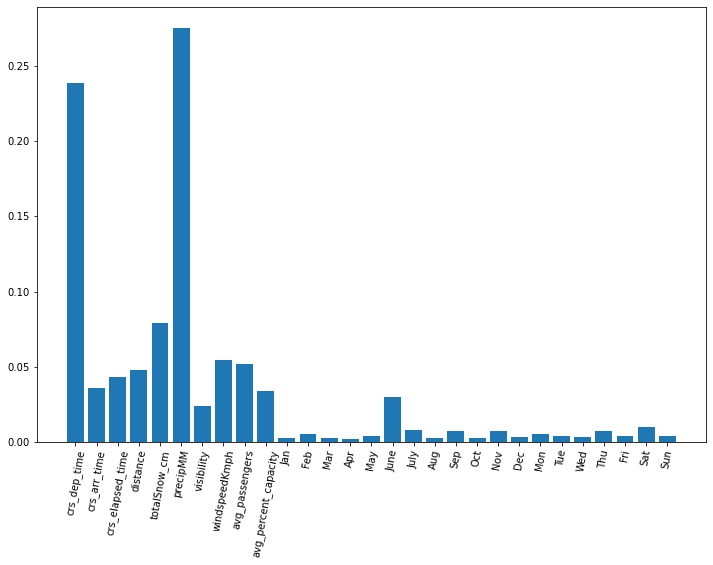

In [59]:
plt.subplots(figsize=(12,8))
pyplot.bar(features_df3.index,features_df3['feature_importance'])
plt.xticks(rotation=80)

pyplot.show()

### Try GridSearch with no bins on new data

In [60]:
df_flights3 = pd.read_csv('cleaned_flights_sample2.csv')

In [64]:
df_flights3.head()

,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,avg_passengers,avg_percent_capacity
0,20,21,106.0,72.0,243.0,6,1,0.0,0.4,10,8,39.0,0.77
1,8,9,46.0,71.0,282.0,7,1,0.0,6.5,9,18,55.0,0.71
2,7,9,19.0,154.0,773.0,10,4,0.0,0.1,10,8,41.0,0.81
3,22,0,8.0,156.0,815.0,10,0,0.0,0.7,8,5,53.0,0.77
4,6,10,-25.0,318.0,1990.0,10,5,0.0,0.1,10,14,160.0,0.89


In [83]:
df_flights3.corr()>0.7

,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,avg_passengers,avg_percent_capacity
crs_dep_time,True,False,False,False,False,False,False,False,False,False,False,False,False
crs_arr_time,False,True,False,False,False,False,False,False,False,False,False,False,False
arr_delay,False,False,True,False,False,False,False,False,False,False,False,False,False
crs_elapsed_time,False,False,False,True,True,False,False,False,False,False,False,False,False
distance,False,False,False,True,True,False,False,False,False,False,False,False,False
month,False,False,False,False,False,True,False,False,False,False,False,False,False
weekday,False,False,False,False,False,False,True,False,False,False,False,False,False
totalSnow_cm,False,False,False,False,False,False,False,True,False,False,False,False,False
precipMM,False,False,False,False,False,False,False,False,True,False,False,False,False
visibility,False,False,False,False,False,False,False,False,False,True,False,False,False


In [63]:
# Trying with no bins as they dont seem to have much importance from above.
df_flights3 = df_flights3.drop(['fl_date','op_unique_carrier','origin','dest','crs_dep_bin','crs_arr_bin','departures_performed','payload','seats','passengers','freight','mail','ramp_to_ramp'],axis=1)

In [65]:
X4 = df_flights3.drop(['arr_delay'],axis=1)
y4 = df_flights3['arr_delay']

In [66]:
scaler = StandardScaler()
X_scale4 = scaler.fit_transform(X4)
X_scale4 = pd.DataFrame(X_scale4,columns=X4.columns)

In [67]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_scale4,y4,test_size=0.25)

In [68]:
params = {
    'n_estimators': [50,100,150,200,250,300],
    'max_depth': [1,3,5,7,9]
}
n=5

In [69]:
rf = RandomForestRegressor()
grid4 = GridSearchCV(estimator=rf,param_grid=params,cv=n,scoring='r2',verbose=1,n_jobs=-1)

In [70]:
grid_results4 = grid4.fit(X_train4,y_train4)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [71]:
#save model with pickle
# filename4 = 'GridSearchCV4.sav'
# pickle.dump(grid4,open(filename4,'wb'))

In [ ]:
#load model with pickle
grid_results4 = pickle.load(open('GridSearchCV4.sav','rb'))

In [72]:
grid_pred4 = grid_results4.predict(X_test4)

In [73]:
rf_rmse4 = np.sqrt(mean_squared_error(y_test4,grid_pred4))
print(rf_rmse4)

28.32346858654559


In [88]:
mean_squared_error(y_test4,grid_pred4)

802.2188727730348

In [74]:
rf_mae4 = mean_absolute_error(y_test4,grid_pred4)
print(f'Mean Absolute Error: {rf_mae4}')

Mean Absolute Error: 18.617014393077834


In [75]:
best_score4 = grid_results4.best_score_
best_params4 = grid_results4.best_params_
print('Best Score:',best_score4)
print('Best Params:',best_params4)

Best Score: 0.06211315555362242
Best Params: {'max_depth': 9, 'n_estimators': 250}


In [76]:
grid_diff4 = grid_pred4-y_test4
grid_df4 = pd.DataFrame({'grid_pred':grid_pred4,
                       'y_test':y_test4,
                       'difference':grid_diff4})

In [77]:
grid_df4.describe()

,grid_pred,y_test,difference
count,72140.000000,72140.000000,72140.000000
mean,1.062228,1.170571,-0.108343
std,6.896547,29.304007,28.323458
min,-17.614011,-80.000000,-167.240732
25%,-3.645195,-15.000000,-6.058266
50%,-0.742369,-7.000000,6.444146
75%,3.254403,6.000000,15.619913
max,62.809375,162.000000,83.598194


In [78]:
feature_importances4 = grid_results4.best_estimator_.feature_importances_

In [79]:
feature_importances4 = {'feature_importance':feature_importances4}
features_df4 = pd.DataFrame(feature_importances4,index=X_test4.columns)

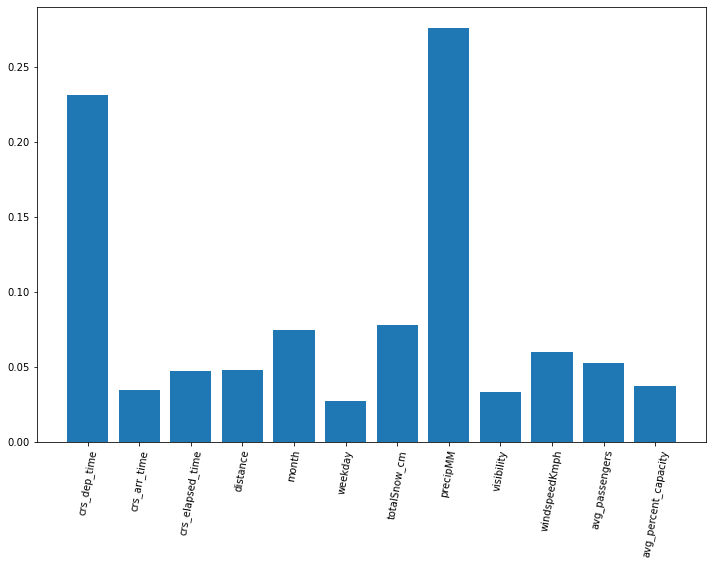

In [80]:
plt.subplots(figsize=(12,8))
pyplot.bar(features_df4.index,features_df4['feature_importance'])
plt.xticks(rotation=80)

pyplot.show()

### Try using labels on origin and carrier

In [3]:
df_flights4 = pd.read_csv('cleaned_flights_sample2.csv')

In [5]:
df_flights4.head()

,fl_date,op_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,crs_dep_bin,crs_arr_bin,totalSnow_cm,precipMM,visibility,windspeedKmph,departures_performed,payload,seats,passengers,freight,mail,ramp_to_ramp,avg_passengers,avg_percent_capacity
0,2019-06-18,OO,DTW,PLN,20,21,106.0,72.0,243.0,6,1,Night,Night,0.0,0.4,10,8,100.0,1238000.0,5000.0,3868.0,0.0,0.0,6429.0,39.0,0.77
1,2019-07-02,YV,DFW,LBB,8,9,46.0,71.0,282.0,7,1,Afternoon,Afternoon,0.0,6.5,9,18,169.0,3415490.0,13150.0,9361.0,1346.0,1260.0,10863.0,55.0,0.71
2,2019-10-11,ZW,SAV,ORD,7,9,19.0,154.0,773.0,10,4,Afternoon,Afternoon,0.0,0.1,10,8,26.0,626600.0,1300.0,1058.0,0.0,0.0,3796.0,41.0,0.81
3,2019-10-14,OH,CLT,DSM,22,0,8.0,156.0,815.0,10,0,Night,Morning,0.0,0.7,8,5,92.0,1746550.0,6343.0,4891.0,42.0,0.0,14307.0,53.0,0.77
4,2019-10-26,DL,JFK,SLC,6,10,-25.0,318.0,1990.0,10,5,Afternoon,Afternoon,0.0,0.1,10,14,115.0,5919710.0,20844.0,18457.0,49708.0,93985.0,35621.0,160.0,0.89


In [6]:
df_flights4 = df_flights4.drop(['fl_date','crs_dep_bin','dest','crs_arr_bin','departures_performed','payload','seats','passengers','freight','mail','ramp_to_ramp'],axis=1)

In [7]:
le = LabelEncoder()

In [8]:
df_flights4['op_unique_carrier'] = le.fit_transform(df_flights4['op_unique_carrier'])
df_flights4['origin'] = le.fit_transform(df_flights4['origin'])

In [9]:
X5 = df_flights4.drop(['arr_delay'],axis=1)
y5 = df_flights4['arr_delay']

In [10]:
scaler = StandardScaler()
X_scale5 = scaler.fit_transform(X5)
X_scale5 = pd.DataFrame(X_scale5,columns=X5.columns)

In [11]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_scale5,y5,test_size=0.25)

In [12]:
params = {
    'n_estimators': [230,250,270],
    'max_depth': [8,9,10]
}
n=5

In [111]:
rf = RandomForestRegressor()
grid5 = GridSearchCV(estimator=rf,param_grid=params,cv=n,scoring='r2',verbose=1,n_jobs=-1)

In [112]:
grid_results5 = grid5.fit(X_train5,y_train5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [113]:
#save model with pickle
# filename5 = 'GridSearchCV5.sav'
# pickle.dump(grid5,open(filename5,'wb'))

In [13]:
#load model with pickle
grid_results5 = pickle.load(open('GridSearchCV5.sav','rb'))

In [14]:
grid_pred5 = grid_results5.predict(X_test5)

In [15]:
rf_rmse5 = np.sqrt(mean_squared_error(y_test5,grid_pred5))
print(rf_rmse5)

27.486766233439955


In [16]:
rf_mae5 = mean_absolute_error(y_test5,grid_pred5)
print(f'Mean Absolute Error: {rf_mae5}')

Mean Absolute Error: 18.18374459522019


In [17]:
best_score5 = grid_results5.best_score_
best_params5 = grid_results5.best_params_
print('Best Score:',best_score5)
print('Best Params:',best_params5)

Best Score: 0.0675351600081749
Best Params: {'max_depth': 10, 'n_estimators': 250}


In [18]:
grid_diff5 = grid_pred5-y_test5
grid_df5 = pd.DataFrame({'grid_pred':grid_pred5,
                       'y_test':y_test5,
                       'difference':grid_diff5})

In [19]:
grid_df5.describe()

,grid_pred,y_test,difference
count,72140.000000,72140.000000,72140.000000
mean,1.036129,1.107860,-0.071730
std,7.195142,29.074868,27.486863
min,-18.901171,-66.000000,-167.905666
25%,-3.702615,-15.000000,-6.082581
50%,-0.786138,-7.000000,6.356178
75%,3.290830,6.000000,15.294592
max,90.433030,162.000000,93.026016


In [20]:
feature_importances5 = grid_results5.best_estimator_.feature_importances_

In [21]:
feature_importances5 = {'feature_importance':feature_importances5}
features_df5 = pd.DataFrame(feature_importances5,index=X_test5.columns)

In [24]:
features_df5 = features_df5.sort_values('feature_importance',ascending=False)

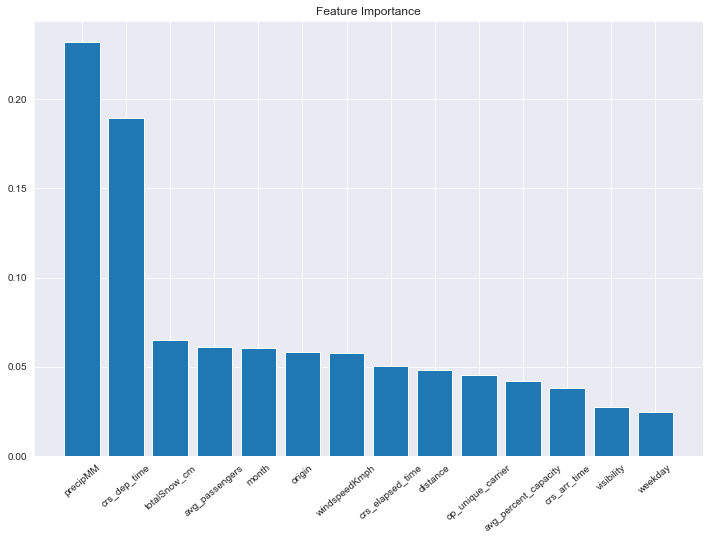

In [29]:
plt.subplots(figsize=(12,8))
pyplot.bar(features_df5.index,features_df5['feature_importance'])
plt.xticks(rotation=40)
plt.title('Feature Importance')
pyplot.show()

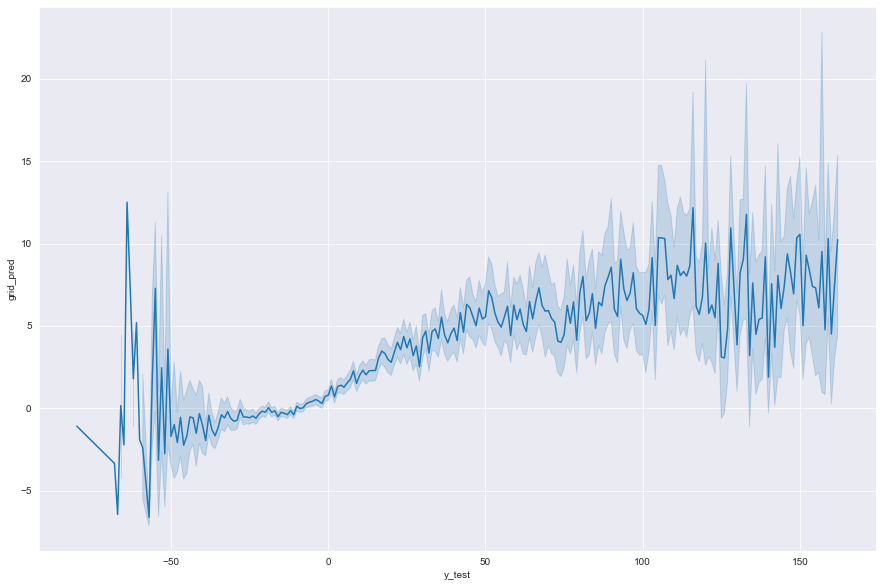

In [165]:
plt.subplots(figsize=(15,10))
sns.lineplot(data=grid_df5,y='grid_pred',x='y_test')
plt.show()

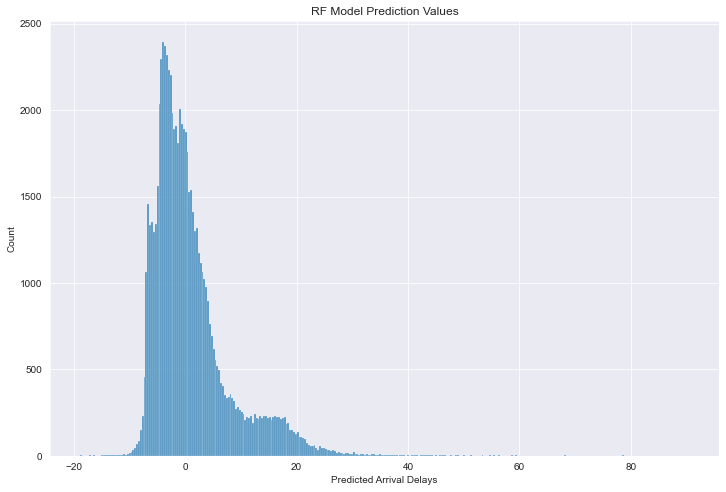

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(grid_pred5)
plt.title('RF Model Prediction Values')
plt.xlabel('Predicted Arrival Delays')
plt.show()

In [4]:
flights = df_flights4[df_flights4['arr_delay']>10]

In [5]:
flights

,fl_date,op_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,crs_dep_bin,crs_arr_bin,totalSnow_cm,precipMM,visibility,windspeedKmph,departures_performed,payload,seats,passengers,freight,mail,ramp_to_ramp,avg_passengers,avg_percent_capacity
0,2019-06-18,OO,DTW,PLN,20,21,106.0,72.0,243.0,6,1,Night,Night,0.0,0.4,10,8,100.0,1238000.0,5000.0,3868.0,0.0,0.0,6429.0,39.0,0.77
1,2019-07-02,YV,DFW,LBB,8,9,46.0,71.0,282.0,7,1,Afternoon,Afternoon,0.0,6.5,9,18,169.0,3415490.0,13150.0,9361.0,1346.0,1260.0,10863.0,55.0,0.71
2,2019-10-11,ZW,SAV,ORD,7,9,19.0,154.0,773.0,10,4,Afternoon,Afternoon,0.0,0.1,10,8,26.0,626600.0,1300.0,1058.0,0.0,0.0,3796.0,41.0,0.81
19,2019-08-04,DL,SLC,AUS,14,18,13.0,162.0,1086.0,8,6,Evening,Night,0.0,1.2,10,11,59.0,2049495.0,7869.0,7261.0,1422.0,51547.0,9516.0,123.0,0.92
33,2019-04-21,WN,ATL,BWI,19,21,27.0,110.0,577.0,4,6,Night,Night,0.0,0.0,10,12,164.0,5727200.0,23644.0,19432.0,28575.0,0.0,16757.0,118.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288524,2019-10-04,AA,LAX,JFK,16,0,53.0,315.0,2475.0,10,4,Evening,Morning,0.0,0.0,10,7,336.0,16262400.0,34272.0,30970.0,74509.0,81140.0,106151.0,92.0,0.90
288534,2019-04-30,UA,SFO,EWR,17,1,69.0,319.0,2565.0,4,1,Evening,Morning,0.0,0.1,10,16,401.0,26794319.0,86029.0,72753.0,1286456.0,205471.0,128940.0,181.0,0.85
288542,2019-02-16,OO,ORD,MCI,17,19,76.0,101.0,403.0,2,5,Evening,Night,0.1,0.2,10,11,44.0,703160.0,3065.0,2713.0,0.0,0.0,4535.0,62.0,0.89
288551,2019-01-19,YV,DFW,OKC,6,7,24.0,60.0,175.0,1,5,Afternoon,Afternoon,0.0,6.8,9,35,78.0,1576380.0,6069.0,4311.0,0.0,0.0,4436.0,55.0,0.71


In [6]:
flights.describe()

,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,month,weekday,totalSnow_cm,precipMM,visibility,windspeedKmph,departures_performed,payload,seats,passengers,freight,mail,ramp_to_ramp,avg_passengers,avg_percent_capacity
count,60313.000000,60313.000000,60313.000000,60313.000000,60313.000000,60313.000000,60313.000000,60313.000000,60313.000000,60313.000000,60313.000000,60313.000000,6.031300e+04,60313.000000,60313.000000,6.031300e+04,60313.000000,60313.000000,60313.000000,60313.000000
mean,14.258419,15.689802,44.709333,141.642946,793.057948,6.471673,2.916734,0.239038,5.340875,9.159833,12.825129,125.625520,4.332677e+06,16859.228160,14101.790493,3.027571e+04,13834.426376,16613.209341,102.550429,0.820002
std,4.664682,5.217458,34.928604,72.200232,589.735088,3.384567,1.979735,1.436146,9.274180,1.328561,5.703614,98.369178,4.537749e+06,17049.118306,14675.293863,1.296768e+05,48787.360782,16448.595677,47.217424,0.094270
min,0.000000,0.000000,11.000000,20.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+04,50.000000,13.000000,0.000000e+00,0.000000,44.000000,3.000000,0.040000
25%,11.000000,12.000000,18.000000,90.000000,358.000000,4.000000,1.000000,0.000000,0.000000,9.000000,9.000000,56.000000,1.137272e+06,4636.000000,3786.000000,0.000000e+00,0.000000,6323.000000,56.000000,0.770000
50%,15.000000,17.000000,32.000000,124.000000,641.000000,6.000000,3.000000,0.000000,1.000000,10.000000,12.000000,96.000000,2.572200e+06,10126.000000,8315.000000,6.180000e+02,0.000000,11357.000000,112.000000,0.840000
75%,18.000000,20.000000,60.000000,170.000000,1024.000000,9.000000,4.000000,0.000000,7.000000,10.000000,16.000000,170.000000,5.974624e+06,23693.000000,19815.000000,1.316700e+04,17.000000,20903.000000,140.000000,0.890000
max,23.000000,23.000000,162.000000,690.000000,5095.000000,12.000000,6.000000,44.200000,204.300000,10.000000,49.000000,844.000000,3.356554e+07,111897.000000,97794.000000,2.448443e+06,933801.000000,166969.000000,349.000000,1.000000


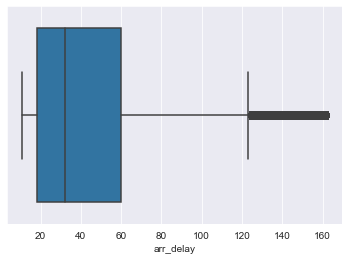

In [37]:
sns.boxplot(data=flights,x='arr_delay')
plt.show()